In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import geopandas
import plotly.express as px
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import imageio
import mapclassify
import matplotlib
import warnings
warnings.filterwarnings("ignore")
import matplotlib.image as mpimg
%matplotlib inline
import ast

In [2]:
df = pd.read_csv('/Volumes/圆滚滚/Different_versions_store_closure_performance/nyc/With_Staten_Island/pred_visits_2019pred_2018params.csv')

In [64]:
table_2018 = pd.read_csv('/Volumes/圆滚滚/Different_versions_store_closure_performance/nyc/With_Staten_Island/table_2018.csv')
table_2018['B_store'].nunique()

282

In [3]:
df['A_cbg'].nunique()

6493

In [4]:
data = df[df['assumed_visits'] != 'no visitors in 2018']

In [5]:
data['A_cbg'].nunique()

6298

In [6]:
data['B_store'].nunique()

282

In [68]:
list(set(data['B_store'].tolist()) - set(table_2018['B_store'].tolist()))

[]

In [7]:
data_here = data[['B_store', 'D_Number_of_Visits', 'assumed_visits']]

In [8]:
info = pd.read_csv('/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/data/first_step_data_with_competitors.csv')
info

,Unnamed: 0,safegraph_place_id,area_square_feet,geometry,store-name,brands,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,iso_country_code,address,if_target,includes_parking_lot
0,0,sg:81aae721ea114787a6e105b349eeb400,19853,POINT (-73.96154 40.768158),T18,Target,Department Stores,Department Stores,452210.0,40.768158,-73.961540,1201 3rd Ave,New York,NY,10021,US,"1201 3rd Ave, New York, NY",1,0
1,1,sg:1ac978d80ab84d4aa1d9f7148d1fafb8,68087,POINT (-73.833733 40.783772),T07,Target,Department Stores,Department Stores,452210.0,40.783772,-73.833733,13505 20th Ave,College Point,NY,11356,US,"13505 20th Ave, College Point, NY",1,1
2,2,sg:084ab2c726784ab490b72144d44d4ee8,40818,POINT (-73.946744 40.631371),T02,Target,Department Stores,Department Stores,452210.0,40.631371,-73.946744,1598 Flatbush Ave,Brooklyn,NY,11210,US,"1598 Flatbush Ave, Brooklyn, NY",1,0
3,3,sg:eb96ed984b274a57ae29762d73738d99,18706,POINT (-73.95946600000001 40.607664),T19,Target,Department Stores,Department Stores,452210.0,40.607664,-73.959466,1715 E 13th St,Brooklyn,NY,11229,US,"1715 E 13th St, Brooklyn, NY",1,0
4,4,sg:5fe86b949ad24e79b59672ae1b6d148d,39355,POINT (-74.01115 40.714668),T10,Target,Department Stores,Department Stores,452210.0,40.714668,-74.011150,255 Greenwich St,New York,NY,10007,US,"255 Greenwich St, New York, NY",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,259,sg:be186470ad2d40e2917b9033eebcb327,5090,POINT (-73.869198 40.708655),Five Below10,Five Below,"General Merchandise Stores, including Warehous...",All Other General Merchandise Stores,452319.0,40.708655,-73.869198,8016 Cooper Ave,Glendale,NY,11385,US,"8016 Cooper Ave, Glendale, NY",0,unchecked
280,260,sg:372bb8517c81493daaf891f47605834a,6020,POINT (-73.95849200000001 40.60922100000001),T.J. Maxx23,T.J. Maxx,Department Stores,Department Stores,452210.0,40.609221,-73.958492,1630 E 15th St,Brooklyn,NY,11229,US,"1630 E 15th St, Brooklyn, NY",0,0
281,261,sg:3a98413525ca4c7c951f55f909d88ae3,7943,POINT (-73.741744 40.716489),Dollar Tree77,Dollar Tree,"General Merchandise Stores, including Warehous...",All Other General Merchandise Stores,452319.0,40.716489,-73.741744,21450 Jamaica Ave,Queens Village,NY,11428,US,"21450 Jamaica Ave, Queens Village, NY",0,unchecked
282,262,sg:84a8615ac25b455bb1d01ec4c93cdd1f,96668,POINT (-74.16537099999999 40.583277),Macy's09,Macy's,Department Stores,Department Stores,452210.0,40.583277,-74.165371,98 Richmond Hill Road,New York,NY,10314,US,"98 Richmond Hill Road, New York, NY",0,1


In [9]:
target_ids = info[info['brands'] == 'Target']['safegraph_place_id'].tolist()
data[data['B_store'].isin(target_ids)]['B_store'].nunique()

20

In [10]:
data_here['assumed_visits'] = data_here['assumed_visits'].astype('float')
data_here['D_Number_of_Visits'] = data_here['D_Number_of_Visits'].astype('float')

In [11]:
data_here

,B_store,D_Number_of_Visits,assumed_visits
0,sg:51c8d943ff72400ab86e7e8896f4b5af,0.0,1.595283e-09
1,sg:f189f91419974d03a20257132d73da58,0.0,7.433282e-10
2,sg:c7222887b3834a58a6bc40c168cdb38a,0.0,2.983747e-33
3,sg:e2543bebe82742a1941c21660d9f4168,61.0,1.262999e+02
4,sg:3275834c58d241baacdb9965f5003af6,0.0,8.803924e-14
...,...,...,...
1831021,sg:5aa2ec5e377c486ca69da4542b6e4307,0.0,2.321101e-22
1831022,sg:07fafdb3637c46e88d42a8fc2dce529a,0.0,5.692949e-30
1831023,sg:9bbf6c92e7cf4768a8cfdccab7bfb693,0.0,2.545639e-45
1831024,sg:e4019da3119b4ebfac7b8f9907d68d7c,0.0,2.122667e-39


In [12]:
#data_here['Pearson Correlation'] = data_here.apply(lambda x: stats.pearsonr(x['D_Number_of_Visits'], x['assumed_visits']), axis = 1)
cbgs_good = list(data['A_cbg'].unique())
pearson_corrs = {'cbg': [], 'Pearson Correlation_stats': []}
for c in cbgs_good:
    pearson_corrs['cbg'].append(c)
    df_temp = data[data['A_cbg'] == c]
    df_temp['assumed_visits'] = df_temp['assumed_visits'].astype('float')
    df_temp['D_Number_of_Visits'] = df_temp['D_Number_of_Visits'].astype('float')
    pearson_corrs['Pearson Correlation_stats'].append(stats.pearsonr(df_temp['D_Number_of_Visits'], df_temp['assumed_visits']))

In [13]:
pearson_df = pd.DataFrame(pearson_corrs)
pearson_df['Pearson Correlation'] = pearson_df['Pearson Correlation_stats'].apply(lambda x: x[0])

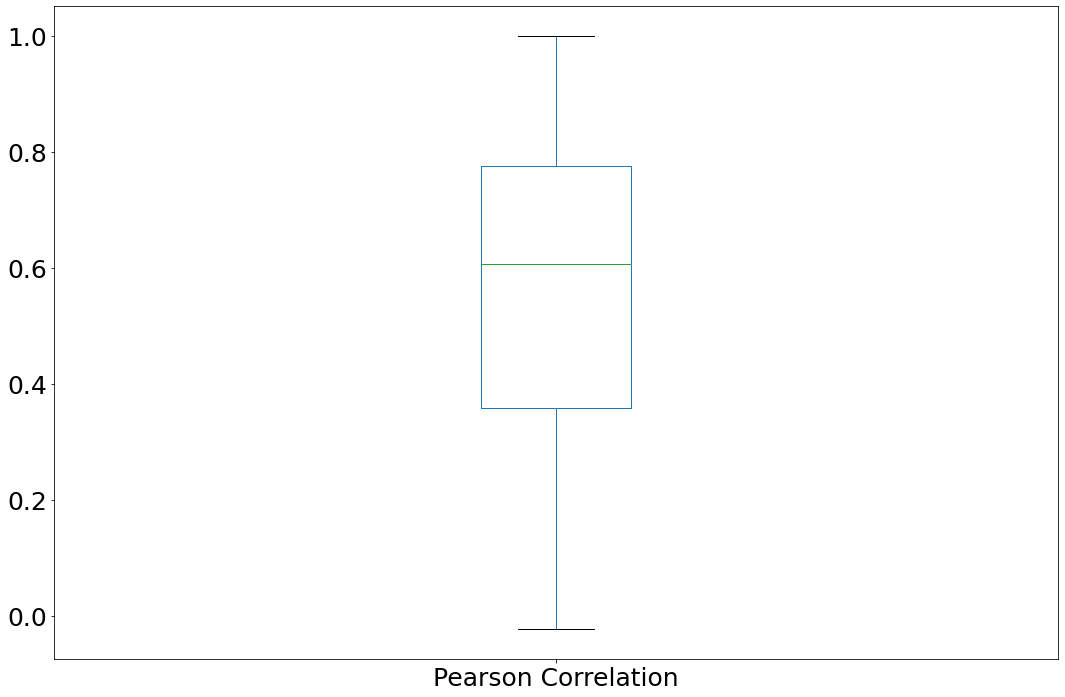

In [90]:
plt.figure(figsize=(18, 12))
pearson_df.boxplot(column = ['Pearson Correlation'], grid=False)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.savefig('/Volumes/圆滚滚/Different_versions_store_closure_performance/nyc/With_Staten_Island/figures/Pearson_correlation_2019pred_2018params_NYC.png', 
            bbox_inches='tight', dpi=200)
#plt.show()

In [14]:
sum_by_store = data_here.groupby('B_store')['D_Number_of_Visits','assumed_visits'].sum().reset_index()

In [15]:
stats.pearsonr(data_here['D_Number_of_Visits'], data_here['assumed_visits'])

(0.6535149467927154, 0.0)

In [16]:
stats.pearsonr(sum_by_store['D_Number_of_Visits'],sum_by_store['assumed_visits'])

(0.7738405818910183, 1.7963588772223607e-57)

In [17]:
sum_by_store = pd.merge(sum_by_store, info[['safegraph_place_id', 'brands']], left_on = 'B_store', right_on = 'safegraph_place_id', how = 'left')

In [19]:
store_info = pd.read_csv('/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/data/all_info_after_aggregation.csv').drop(columns = 'Unnamed: 0')
info_df = store_info.copy()
info_df['longitude'] = info_df['geo'].apply(lambda x:ast.literal_eval(x)[1])
info_df['latitude'] = info_df['geo'].apply(lambda x:ast.literal_eval(x)[0])
geometry = [Point(xy) for xy in zip(info_df.longitude, info_df.latitude)]
info_df = info_df.drop(['longitude', 'latitude'], axis=1)
info_gdf = GeoDataFrame(info_df, crs="EPSG:4326", geometry=geometry)

In [20]:
data.shape

(1776036, 13)

In [21]:
visits_by_brand_map = pd.merge(data, info[['brands', 'safegraph_place_id']], left_on = 'B_store', right_on = 'safegraph_place_id')

In [22]:
visits_by_brand_map['assumed_visits'] = visits_by_brand_map['assumed_visits'].astype('float')

In [23]:
visits_by_brand_map = visits_by_brand_map.groupby(['A_cbg', 'brands'])[['D_Number_of_Visits', 'assumed_visits']].sum().reset_index()

In [24]:
shp_path = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/tl_2017_36_bg/tl_2017_36_bg.shp'
shp_df = geopandas.GeoDataFrame.from_file(shp_path,encoding = 'gb18030')

cbg_info = {}
cbg_id = shp_df['GEOID'].tolist()
cbg_geo = shp_df['geometry'].tolist()
for i in range(len(cbg_id)):
    cbg_info[cbg_id[i]] = cbg_geo[i]

In [25]:
visits_by_brand_map['cbg_geometry'] = visits_by_brand_map['A_cbg'].apply(lambda x: cbg_info[str(x)])

In [26]:
visits_by_brand_map = GeoDataFrame(visits_by_brand_map)

In [27]:
visits_by_Target_map = pd.merge(data, info[['brands', 'safegraph_place_id']], left_on = 'B_store', right_on = 'safegraph_place_id')
visits_by_Target_map['assumed_visits'] = visits_by_brand_map['assumed_visits'].astype('float')
visits_by_Target_map['if_Target'] = visits_by_Target_map['brands'].apply(lambda x: x == 'Target')
visits_by_Target_map = visits_by_Target_map.groupby(['A_cbg', 'if_Target'])[['D_Number_of_Visits', 'assumed_visits']].sum().reset_index()

In [28]:
visits_by_Target_map['cbg_geometry'] = visits_by_Target_map['A_cbg'].apply(lambda x: cbg_info[str(x)])
visits_by_Target_map = GeoDataFrame(visits_by_Target_map)

In [30]:
info_gdf

,safegraph_place_id,geo,area_square_feet,geometry
0,sg:81aae721ea114787a6e105b349eeb400,"(40.768158, -73.96154)",19853,POINT (-73.96154 40.76816)
1,sg:1ac978d80ab84d4aa1d9f7148d1fafb8,"(40.783772, -73.833733)",68087,POINT (-73.83373 40.78377)
2,sg:72ea28e3e1a54cc0849b69121b98e1cd,"(40.684647, -73.976486)",126053,POINT (-73.97649 40.68465)
3,sg:084ab2c726784ab490b72144d44d4ee8,"(40.631371, -73.946744)",40818,POINT (-73.94674 40.63137)
4,sg:eb96ed984b274a57ae29762d73738d99,"(40.607664, -73.959466)",18706,POINT (-73.95947 40.60766)
...,...,...,...,...
280,sg:84a8615ac25b455bb1d01ec4c93cdd1f,"(40.583277, -74.165371)",96668,POINT (-74.16537 40.58328)
281,sg:ede0c3b8b3a143848181ee2430390072,"(40.659248, -73.908321)",5885,POINT (-73.90832 40.65925)
282,aggregated_517E,"(40.795408, -73.93100799999999)",169356,POINT (-73.93101 40.79541)
283,aggregated_4024_College,"(40.757749, -73.834744)",214735,POINT (-73.83474 40.75775)


In [32]:
good_cbgs_2018 = list(data['A_cbg'].unique())
cbgs = list(df['A_cbg'].unique())

In [35]:
len(good_cbgs_2018)

6298

In [54]:
visits_by_Target_map

,A_cbg,if_Target,D_Number_of_Visits,assumed_visits,cbg_geometry
0,360050001001,False,37,0.669129,"POLYGON ((-73.89266 40.79382, -73.89194 40.796..."
1,360050001001,True,0,131.543781,"POLYGON ((-73.89266 40.79382, -73.89194 40.796..."
2,360050002001,False,558,1575.458359,"POLYGON ((-73.86333 40.81478, -73.86240 40.814..."
3,360050002001,True,38,410.337850,"POLYGON ((-73.86333 40.81478, -73.86240 40.814..."
4,360050002002,False,997,0.005384,"POLYGON ((-73.86522 40.81453, -73.86425 40.814..."
...,...,...,...,...,...
12591,360850319022,True,114,0.201512,"POLYGON ((-74.17122 40.63744, -74.16969 40.637..."
12592,360850319023,False,1151,0.654884,"POLYGON ((-74.16619 40.63585, -74.16509 40.635..."
12593,360850319023,True,94,1187.501800,"POLYGON ((-74.16619 40.63585, -74.16509 40.635..."
12594,360850323001,False,1080,622.354946,"POLYGON ((-74.19592 40.63522, -74.19589 40.635..."


In [72]:
info_gdf = GeoDataFrame(info_gdf[info_gdf['safegraph_place_id'].isin(data['B_store'].tolist())])
info_gdf

,safegraph_place_id,geo,area_square_feet,geometry
0,sg:81aae721ea114787a6e105b349eeb400,"(40.768158, -73.96154)",19853,POINT (-73.96154 40.76816)
1,sg:1ac978d80ab84d4aa1d9f7148d1fafb8,"(40.783772, -73.833733)",68087,POINT (-73.83373 40.78377)
3,sg:084ab2c726784ab490b72144d44d4ee8,"(40.631371, -73.946744)",40818,POINT (-73.94674 40.63137)
4,sg:eb96ed984b274a57ae29762d73738d99,"(40.607664, -73.959466)",18706,POINT (-73.95947 40.60766)
5,sg:5fe86b949ad24e79b59672ae1b6d148d,"(40.714667999999996, -74.01115)",39355,POINT (-74.01115 40.71467)
...,...,...,...,...
280,sg:84a8615ac25b455bb1d01ec4c93cdd1f,"(40.583277, -74.165371)",96668,POINT (-74.16537 40.58328)
281,sg:ede0c3b8b3a143848181ee2430390072,"(40.659248, -73.908321)",5885,POINT (-73.90832 40.65925)
282,aggregated_517E,"(40.795408, -73.93100799999999)",169356,POINT (-73.93101 40.79541)
283,aggregated_4024_College,"(40.757749, -73.834744)",214735,POINT (-73.83474 40.75775)


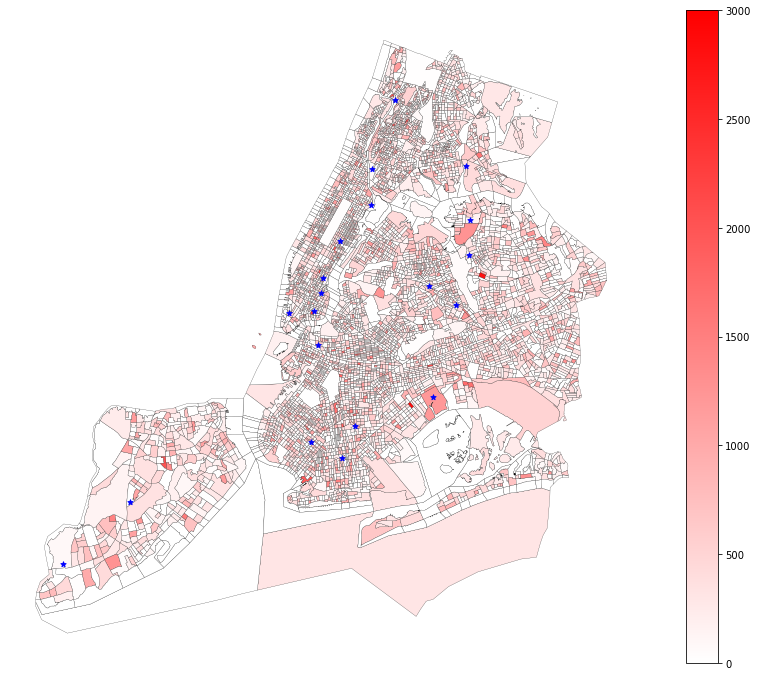

In [93]:
visits_temp = GeoDataFrame(visits_by_Target_map[visits_by_Target_map['if_Target'] == True],geometry = 'cbg_geometry')
for c in cbgs:
    if c not in good_cbgs_2018:
        #print(c)
        visits_temp = visits_temp.append({'A_cbg': c, 'if_Target': True, 'D_Number_of_Visits': 0, 'assumed_visits': 0, 'cbg_geometry': cbg_info[str(c)]}, ignore_index = True)
visits_temp = GeoDataFrame(visits_temp, geometry = 'cbg_geometry')
fig, ax = plt.subplots(1, 1, figsize=[18,12], subplot_kw=dict(aspect='equal'))
base = visits_temp.plot(column = 'assumed_visits',legend = True,ax=ax, 
                        cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","red"]),
                    edgecolor='black',linewidth=0.2,k=6, vmax=3000)
temp = info_gdf[info_gdf['safegraph_place_id'].isin(target_ids)]
temp.plot(ax=ax,marker='*', color = 'blue', markersize=30,label='Target')
#plt.suptitle('Number of Visits',size = 20)
#plt.title('Predicted Visits in Target Stores in 2019',size = 20, pad=20, loc='center')
#for x, y, label in zip(temp.geometry.x, temp.geometry.y, temp.safegraph_place_id):
    #ax.annotate('Target Store', xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.axis('off')
#minx, miny, maxx, maxy = visits_temp.total_bounds
#ax.set_xlim(minx, maxx)
#ax.set_ylim(miny, maxy)
plt.savefig('/Volumes/圆滚滚/Different_versions_store_closure_performance/nyc/With_Staten_Island/figures/predicted_target_2019 (using 2018 cbgs).png', bbox_inches='tight', dpi=200)

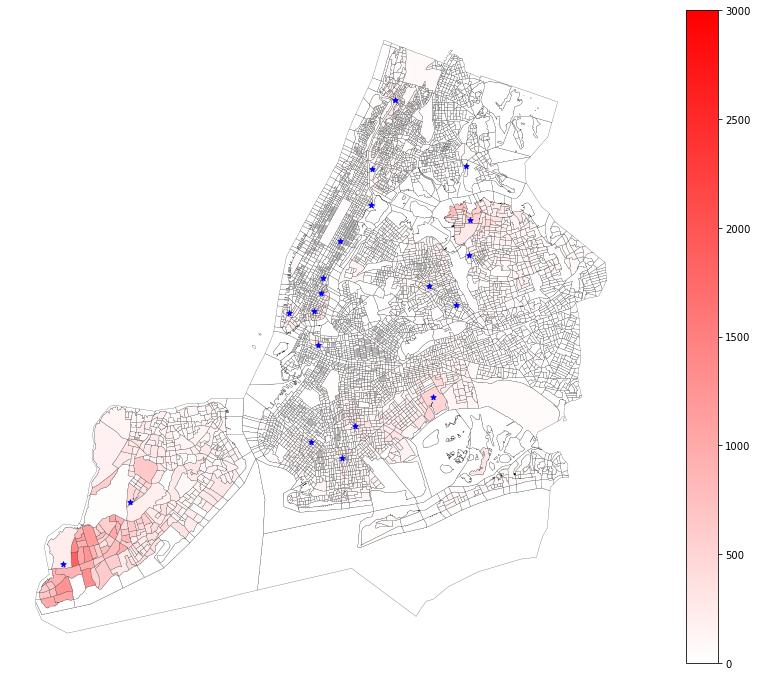

In [94]:
visits_temp = GeoDataFrame(visits_by_Target_map[visits_by_Target_map['if_Target'] == True],geometry = 'cbg_geometry')
for c in cbgs:
    if c not in good_cbgs_2018:
        #print(c)
        visits_temp = visits_temp.append({'A_cbg': c, 'if_Target': True, 'D_Number_of_Visits': 0, 'assumed_visits': 0, 'cbg_geometry': cbg_info[str(c)]}, ignore_index = True)
visits_temp = GeoDataFrame(visits_temp, geometry = 'cbg_geometry')
fig, ax = plt.subplots(1, 1, figsize=[18,12], subplot_kw=dict(aspect='equal'))
base = visits_temp.plot(column = 'D_Number_of_Visits',legend = True,ax=ax, cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","red"]),
                    edgecolor='black',linewidth=0.2,k=6, vmax=3000)
temp = info_gdf[info_gdf['safegraph_place_id'].isin(target_ids)]
temp.plot(ax=ax,marker='*', color = 'blue', markersize=30,label='Target')
#plt.suptitle('Number of Visits',size = 20)
#plt.title('Actual Visits in Target Stores in 2019',size = 20, pad=20, loc='center')
#for x, y, label in zip(temp.geometry.x, temp.geometry.y, temp.safegraph_place_id):
    #ax.annotate('Target Store', xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.axis('off')
plt.savefig('/Volumes/圆滚滚/Different_versions_store_closure_performance/nyc/With_Staten_Island/figures/actual_target_2019 (using 2018 cbgs).png', bbox_inches='tight', dpi=200)

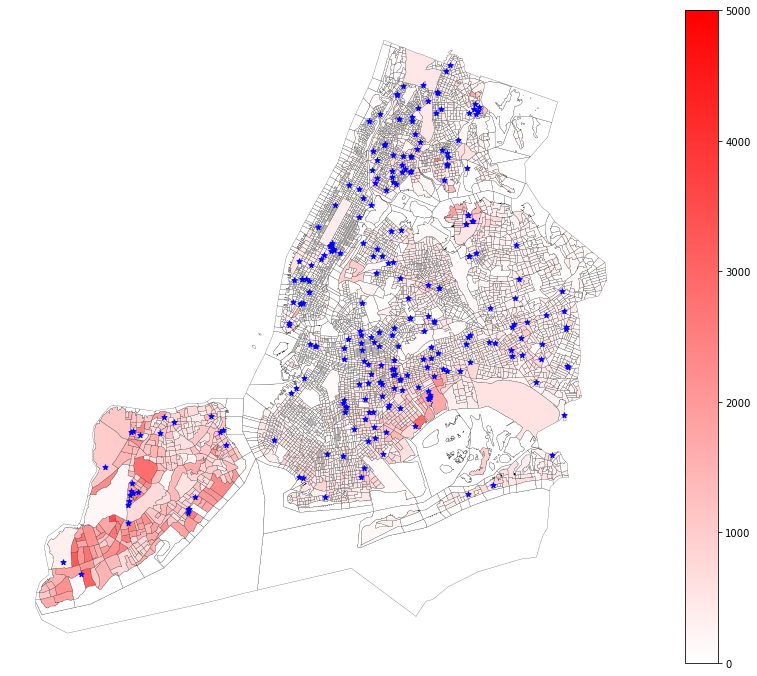

In [84]:
visits_temp = GeoDataFrame(visits_by_Target_map[visits_by_Target_map['if_Target'] != True],geometry = 'cbg_geometry')
for c in cbgs:
    if c not in good_cbgs_2018:
        #print(c)
        visits_temp = visits_temp.append({'A_cbg': c, 'if_Target': True, 'D_Number_of_Visits': 0, 'assumed_visits': 0, 'cbg_geometry': cbg_info[str(c)]}, ignore_index = True)
visits_temp = GeoDataFrame(visits_temp, geometry = 'cbg_geometry')
fig, ax = plt.subplots(1, 1, figsize=[18,12], subplot_kw=dict(aspect='equal'))
base = visits_temp.plot(column = 'D_Number_of_Visits',legend = True,ax=ax, cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","red"]),
                    edgecolor='black',linewidth=0.2,k=6, vmax=5000)
temp = info_gdf[~info_gdf['safegraph_place_id'].isin(target_ids)]
temp.plot(ax=ax,marker='*', color = 'blue', markersize=30,label='Target')
#plt.suptitle('Number of Visits',size = 20)
#plt.title('Actual Visits in Competitor Stores in 2019',size = 20, pad=20, loc='center')
#for x, y, label in zip(temp.geometry.x, temp.geometry.y, temp.safegraph_place_id):
    #ax.annotate('Target Store', xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.axis('off')
plt.savefig('/Volumes/圆滚滚/Different_versions_store_closure_performance/nyc/With_Staten_Island/figures/actual_competitors_2019 (using 2018 cbgs).png', bbox_inches='tight', dpi=200)

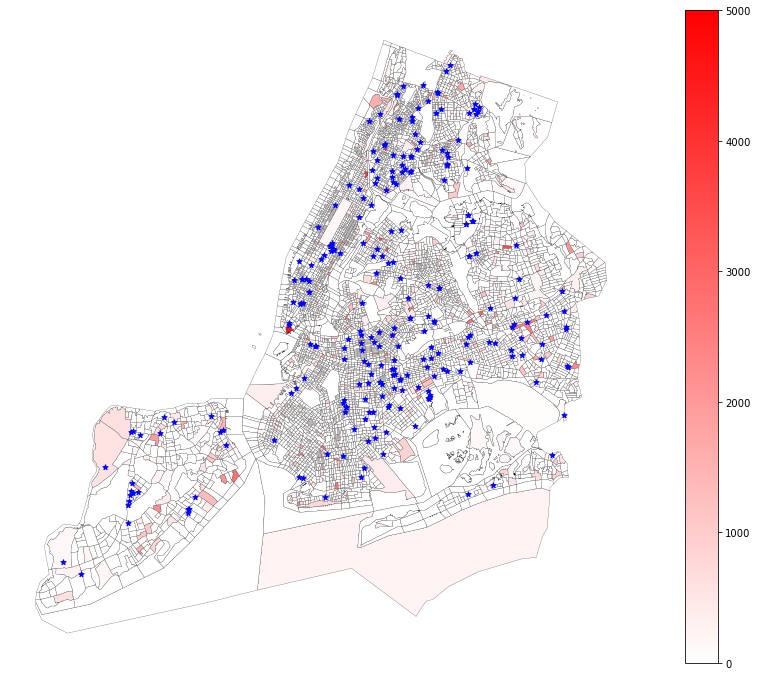

In [85]:
visits_temp = GeoDataFrame(visits_by_Target_map[visits_by_Target_map['if_Target'] != True],geometry = 'cbg_geometry')
for c in cbgs:
    if c not in good_cbgs_2018:
        #print(c)
        visits_temp = visits_temp.append({'A_cbg': c, 'if_Target': True, 'D_Number_of_Visits': 0, 'assumed_visits': 0, 'cbg_geometry': cbg_info[str(c)]}, ignore_index = True)
visits_temp = GeoDataFrame(visits_temp, geometry = 'cbg_geometry')
fig, ax = plt.subplots(1, 1, figsize=[18,12], subplot_kw=dict(aspect='equal'))
base = visits_temp.plot(column = 'assumed_visits',legend = True,ax=ax, cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","red"]),
                    edgecolor='black',linewidth=0.2,k=6, vmax=5000)
temp = info_gdf[~info_gdf['safegraph_place_id'].isin(target_ids)]
temp.plot(ax=ax,marker='*', color = 'blue', markersize=30,label='Target')
#plt.suptitle('Number of Visits',size = 20)
#plt.title('Predicted Visits in Competitor Stores in 2019',size = 20, pad=20, loc='center')
#for x, y, label in zip(temp.geometry.x, temp.geometry.y, temp.safegraph_place_id):
    #ax.annotate('Target Store', xy=(x, y), xytext=(3, 3), textcoords="offset points")
plt.axis('off')
plt.savefig('/Volumes/圆滚滚/Different_versions_store_closure_performance/nyc/With_Staten_Island/figures/predicted_competitors_2019 (using 2018 cbgs).png', bbox_inches='tight', dpi=200)

In [7]:
from scipy import stats

In [8]:
df['A_cbg'].nunique()

6493

In [9]:
max(df['assumed_visits'])

'no visitors in 2018'

In [10]:
data['D_Number_of_Visits'].dtype

dtype('int64')

In [11]:
max(data['assumed_visits'])

'998.8298318724247'

In [12]:
data['assumed_visits'] = data['assumed_visits'].astype('float')

In [13]:
stats.pearsonr(data['D_Number_of_Visits'],data['assumed_visits'])

(0.6535149467927154, 0.0)

In [14]:
stats.spearmanr(data['D_Number_of_Visits'],data['assumed_visits'])

SpearmanrResult(correlation=0.25440248861348236, pvalue=0.0)

In [15]:
stats.kendalltau(data['D_Number_of_Visits'],data['assumed_visits'])

KendalltauResult(correlation=0.20602187703668276, pvalue=0.0)